# Sandpile Game

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

### Functions

In [2]:
def select_element(size):
    '''
    Select a random element from the array.
    '''
    x = np.random.choice(size[0])
    y = np.random.choice(size[1])
    
    return x,y

In [3]:
def collapse(array, element):
    '''
    Determine if a neighbor exists, then increment it by 1.
    '''
    #Determine shape.
    shp = a.shape
    
    #Set Selected Element to Zero
    a[element[0],element[1]] = 0
    
    #Increment neighbors, if they exist.

    #North Neighbor.
    if element[0] != 0:
        a[element[0]-1, element[1]] += 1

    #South Neighbor
    if element[0] != shp[0] - 1:
        a[element[0]+1, element[1]] += 1

    #East Neighbor
    if element[1] != shp[1] - 1:
        a[element[0], element[1]+1] += 1
    
    #West Neighbor
    if element[1] != 0:
        a[element[0], element[1]-1] += 1

### Algorithm

In [14]:
#Initiate grain counter.
num_grains = 1

#Initiate sand pile.
a = np.zeros((50,50))

#Initiate avalanche data collector.
avalanche_info = []

while num_grains <= 1000000:
    #Initiate size of avalanche.
    size_of_avalanches = 0

    #Select where to drop grain of sand.
    element = select_element(a.shape)

    #Drop grain of sand.
    a[element] += 1

    #Check if avalanche is to take place anywhere in the pile.
    avalanches = np.any(np.where(a >= 4, True, False))

    #Collapse the pile at each location with at least 4 sand grains.
    while avalanches == True:
        col_x, col_y = np.where(a >= 4)

        for i in range(0, len(col_x)):
            collapse(a, (col_x[i], col_y[i]))
            size_of_avalanches += 1

        avalanches = np.any(np.where(a >= 4, True, False))

    #Collect data and increment grain counter.
    avalanche_info.append([num_grains, size_of_avalanches])
    num_grains += 1

### Analysis

In [15]:
ava_df = pd.DataFrame(data=avalanche_info, columns=['grains','avalanche_size'])
ava_df = ava_df.loc[ava_df['avalanche_size'] > 0]

In [16]:
count_df = ava_df.groupby(by=['avalanche_size'], as_index=False).agg('count')

In [17]:
count_df['log_count'] = np.log(count_df['grains'])
count_df['log_size'] = np.log(count_df['avalanche_size'])

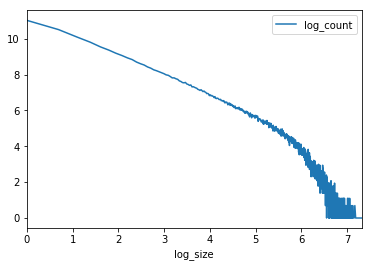

In [18]:
count_df.plot(x='log_size', y='log_count')